Epoch 1/10
120/120 [==============================] - 36s 287ms/step - loss: 2.3231 - accuracy: 0.0968 - val_loss: 2.3163 - val_accuracy: 0.0961
Epoch 2/10
120/120 [==============================] - 34s 284ms/step - loss: 2.3139 - accuracy: 0.0944 - val_loss: 2.3062 - val_accuracy: 0.0963
Epoch 3/10
120/120 [==============================] - 34s 284ms/step - loss: 2.3044 - accuracy: 0.0951 - val_loss: 2.2958 - val_accuracy: 0.0998
Epoch 4/10
109/120 [==========================>...] - ETA: 2s - loss: 2.2937 - accuracy: 0.1000

KeyboardInterrupt: 

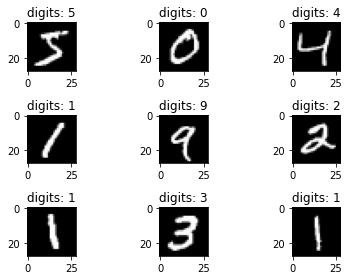

In [10]:

import numpy as np
import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import *
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import KFold
from tensorflow.python.keras import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

shape1 = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title("digits: {}".format(y_train[i]))

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = ( 28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu' ))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


def evaluate_model(X_train, y_train, n_folds = 5):
    accuracy, data = list(), list()
    kfold = Kfold(n_folds, shuffle = True, random_state = 1)
    
    for X_train, X_test in kfold.split(X_train):
        model = create_model()
        
        X_train, y_train, X_test, y_test = X_train[x_train], y_Train[x_train], X_train[x_test], y_train[x_test]
        
        data_fit = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 32)
        
        acc = model.evaluate(X_test, y_test, verbose = 0)
        
        accuracy.append(acc)
        data.append(data_fit)
        
    return accuracy, data
        

def summarize_performance(acc):
    
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (numpy.mean(acc) * 100, numpy.std(acc) * 100, len(acc)))

    pyplot.boxplot(acc)
    pyplot.show()

    
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics = ['accuracy'])

model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 500)


score = model.evaluate(X_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])


